In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_c = pd.read_csv("DATA/q7-cold-waves.tsv",sep="\t", header=None) 
#fecha (de la "ola"), pais, Temperatura (avg), temperatura promedio (avg x pais),  delta (stddev)
df_c.columns = ["date", "country", "T", "avg_t", "delta"]

print('Percentage of missing data')
print((df_c.isnull().sum() / len(df_c))*100)

df_c

Percentage of missing data
date       0.0
country    0.0
T          0.0
avg_t      0.0
delta      0.0
dtype: float64


,date,country,T,avg_t,delta
0,1816-12-01,Asia,-7.257,7.347892,10.173638
1,1817-01-01,Asia,-8.056,7.347892,10.173638
2,1817-02-01,Asia,-4.150,7.347892,10.173638
3,1817-12-01,Asia,-9.253,7.347892,10.173638
4,1818-01-01,Asia,-8.118,7.347892,10.173638
...,...,...,...,...,...
95,1849-01-01,Asia,-7.040,7.347892,10.173638
96,1849-02-01,Asia,-4.330,7.347892,10.173638
97,1849-12-01,Asia,-7.304,7.347892,10.173638
98,1850-01-01,Asia,-9.806,7.347892,10.173638


In [11]:
df_h = pd.read_csv("DATA/q7-heat-waves.tsv",sep="\t", header=None) 
df_h.columns = ["date", "country", "T", "avg_t", "delta"]

print('Percentage of missing data')
print((df_h.isnull().sum() / len(df_h))*100)

df_h

Percentage of missing data
date       0.0
country    0.0
T          0.0
avg_t      0.0
delta      0.0
dtype: float64


,date,country,T,avg_t,delta
0,1817-07-01,Asia,19.248,7.347892,10.173638
1,1817-08-01,Asia,19.727,7.347892,10.173638
2,1818-06-01,Asia,19.872,7.347892,10.173638
3,1818-07-01,Asia,20.193,7.347892,10.173638
4,1818-08-01,Asia,19.414,7.347892,10.173638
...,...,...,...,...,...
95,1849-07-01,Asia,21.053,7.347892,10.173638
96,1849-08-01,Asia,19.556,7.347892,10.173638
97,1850-06-01,Asia,18.441,7.347892,10.173638
98,1850-07-01,Asia,21.122,7.347892,10.173638


In [13]:
places = np.unique(df_h["country"])
print(places.size)
places

1


array(['Asia'], dtype=object)

In [14]:
top = df_h.sort_values(by=['T'], ascending=False).head(30)["country"]
bot = df_h.sort_values(by=['T'], ascending=True).head(30)["country"]
tips = list(top) + list(bot)
top

68    Asia
86    Asia
30    Asia
39    Asia
71    Asia
21    Asia
65    Asia
27    Asia
33    Asia
36    Asia
62    Asia
92    Asia
98    Asia
89    Asia
95    Asia
83    Asia
18    Asia
77    Asia
15    Asia
80    Asia
24    Asia
48    Asia
45    Asia
51    Asia
74    Asia
42    Asia
56    Asia
59    Asia
3     Asia
9     Asia
Name: country, dtype: object

In [16]:
df_h[df_h["country"].isin(top)]

,date,country,T,avg_t,delta
0,1817-07-01,Asia,19.248,7.347892,10.173638
1,1817-08-01,Asia,19.727,7.347892,10.173638
2,1818-06-01,Asia,19.872,7.347892,10.173638
3,1818-07-01,Asia,20.193,7.347892,10.173638
4,1818-08-01,Asia,19.414,7.347892,10.173638
...,...,...,...,...,...
95,1849-07-01,Asia,21.053,7.347892,10.173638
96,1849-08-01,Asia,19.556,7.347892,10.173638
97,1850-06-01,Asia,18.441,7.347892,10.173638
98,1850-07-01,Asia,21.122,7.347892,10.173638


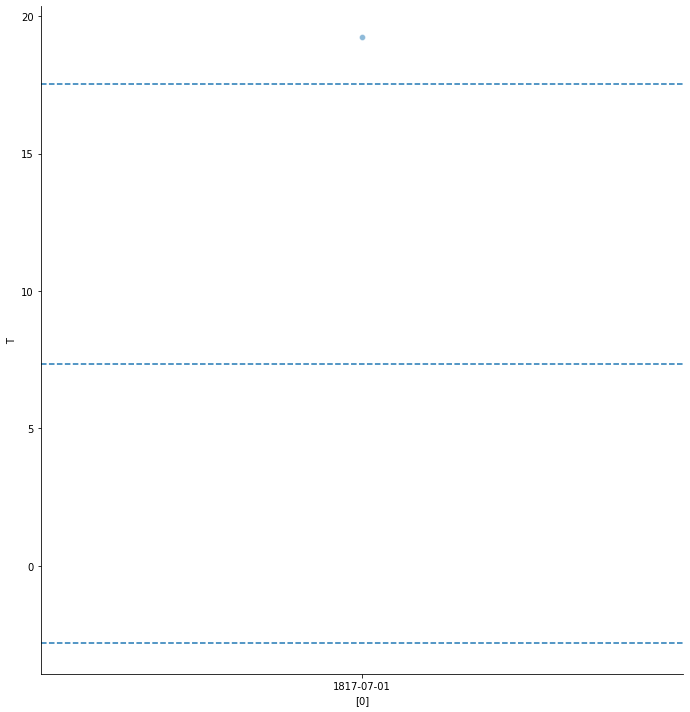

In [29]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
m = df_h[df_h["country"].isin(top)]["avg_t"][0]
splus = m + df_h[df_h["country"].isin(top)]["delta"].loc[0]
smin = m - df_h[df_h["country"].isin(top)]["delta"][0]
g = sns.relplot(x=[0], y="T", ci=None, data=df_h[df_h["country"].isin(top)].iloc[0], height=10, alpha=0.5)
ax0 = g.ax
ax0.axhline(m, ls='--')
ax0.axhline(splus, ls='--')
ax0.axhline(smin, ls='--')
plt.show()

In [23]:
df_h.iloc[0]

date       1817-07-01
country          Asia
T              19.248
avg_t         7.34789
delta         10.1736
Name: 0, dtype: object